### 1. Read Json File

In [8]:
from utils import *

# Load and read the JSON file to extract new parameters
json_path = 'french_polynesia.json'
with open(json_path, 'r') as file:
    df = json.load(file)

In [9]:
connection = df['Connectivity Matrix W'].copy()
community = df['ports_according_communities'].copy()
population = df['n'].copy()

### 2. Construct communities based on locations

In [10]:
community = community_population(community,population)

### 3. Create Connectivity Matrix W

In [11]:
binary_matrix,volume_matrix = connection_matrix(connection,community)
binary_matrix,volume_matrix

(               Outside World  Ahe  Arutua  Bora Bora  Fakarava  Gambier  Hao  \
 Outside World              0    0       0          0         0        0    0   
 Ahe                        0    0       0          0         0        0    0   
 Arutua                     0    0       0          0         0        0    0   
 Bora Bora                  0    0       0          0         1        0    0   
 Fakarava                   0    0       0          1         0        0    0   
 Gambier                    0    0       0          0         0        0    0   
 Hao                        0    0       0          0         0        0    0   
 Hiva Oa                    0    0       0          0         0        0    0   
 Huahine                    0    0       0          1         0        0    0   
 Makemo                     0    0       0          0         0        0    0   
 Manihi                     0    0       0          0         0        0    0   
 Mataiva                    

### 4. Set up Outside World and Locations Initional SEIR statement

In [12]:
#seir_statement_record = {}
community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1
day=1
community_seir = seir_statement(day, inbound, community_seir)
#seir_statement_record[day] = community_seir
community_seir

,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,296,267,29,0,0,0.902027,0.097973,0.0,0.0
Ahe,490,490,0,0,0,1.000000,0.000000,0.0,0.0
Arutua,1736,1736,0,0,0,1.000000,0.000000,0.0,0.0
Bora Bora,10758,10758,0,0,0,1.000000,0.000000,0.0,0.0
Fakarava,1679,1679,0,0,0,1.000000,0.000000,0.0,0.0
Gambier,1570,1570,0,0,0,1.000000,0.000000,0.0,0.0
Hao,1227,1227,0,0,0,1.000000,0.000000,0.0,0.0
Hiva Oa,2371,2371,0,0,0,1.000000,0.000000,0.0,0.0
Huahine,6263,6263,0,0,0,1.000000,0.000000,0.0,0.0
Makemo,1391,1391,0,0,0,1.000000,0.000000,0.0,0.0


### 5. Migration between locations

In [13]:
community_seir, migration_df = migration(community_seir,binary_matrix,volume_matrix)
community_seir

,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,296,346,6,0,0,1.168919,0.02027,0.0,0.0
Ahe,490,490,0,0,0,1.000000,0.00000,0.0,0.0
Arutua,1736,1736,0,0,0,1.000000,0.00000,0.0,0.0
Bora Bora,10758,10758,0,0,0,1.000000,0.00000,0.0,0.0
Fakarava,1679,1679,0,0,0,1.000000,0.00000,0.0,0.0
Gambier,1570,1570,0,0,0,1.000000,0.00000,0.0,0.0
Hao,1227,1227,0,0,0,1.000000,0.00000,0.0,0.0
Hiva Oa,2371,2371,0,0,0,1.000000,0.00000,0.0,0.0
Huahine,6263,6263,0,0,0,1.000000,0.00000,0.0,0.0
Makemo,1391,1391,0,0,0,1.000000,0.00000,0.0,0.0


In [14]:
# Still has problem in Outside World in population
migration_df

,S_out,E_out,I_out,R_out,S_in,E_in,I_in,R_in
Outside World,217,23,0,0,296,0,0,0
Ahe,76,0,0,0,76,0,0,0
Arutua,76,0,0,0,76,0,0,0
Bora Bora,2836,0,0,0,2836,0,0,0
Fakarava,294,0,0,0,294,0,0,0
Gambier,76,0,0,0,76,0,0,0
Hao,106,0,0,0,106,0,0,0
Hiva Oa,334,0,0,0,334,0,0,0
Huahine,829,0,0,0,829,0,0,0
Makemo,83,0,0,0,83,0,0,0


### 6. Infection inside locations

In [15]:
α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

x_updated = infection(α, β, γ, community_seir)
x_updated


,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,296,346,2,4,0,0.982955,0.005682,0.011364,0.0
Ahe,490,490,0,0,0,1.000000,0.000000,0.000000,0.0
Arutua,1736,1736,0,0,0,1.000000,0.000000,0.000000,0.0
Bora Bora,10758,10758,0,0,0,1.000000,0.000000,0.000000,0.0
Fakarava,1679,1679,0,0,0,1.000000,0.000000,0.000000,0.0
Gambier,1570,1570,0,0,0,1.000000,0.000000,0.000000,0.0
Hao,1227,1227,0,0,0,1.000000,0.000000,0.000000,0.0
Hiva Oa,2371,2371,0,0,0,1.000000,0.000000,0.000000,0.0
Huahine,6263,6263,0,0,0,1.000000,0.000000,0.000000,0.0
Makemo,1391,1391,0,0,0,1.000000,0.000000,0.000000,0.0


### 7. No  Prevention Method apply

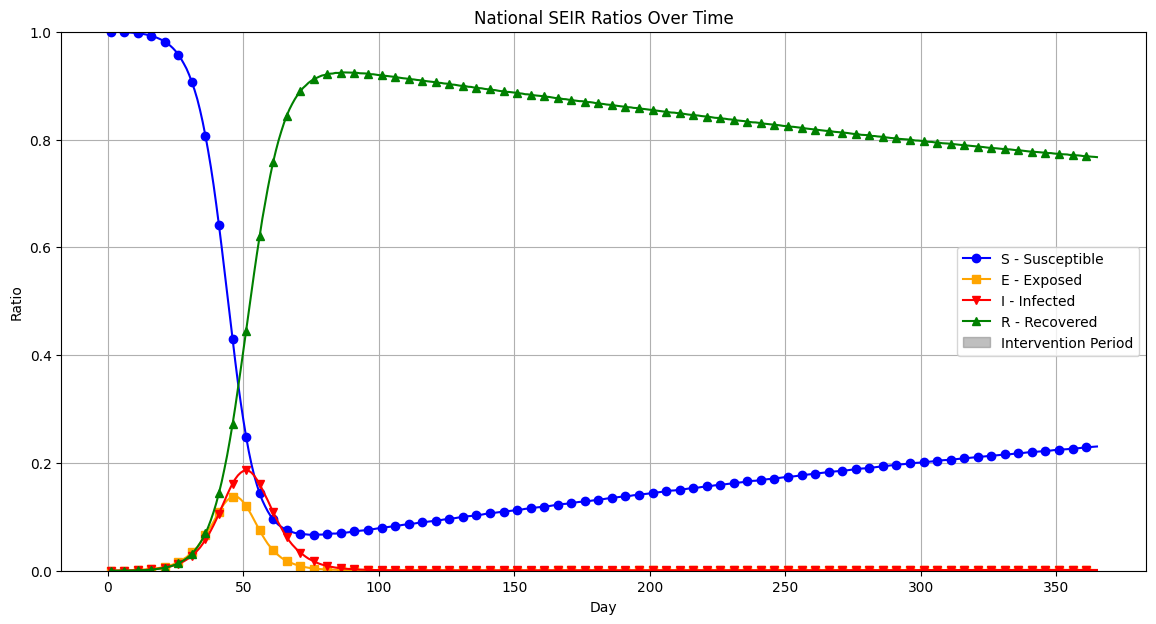

In [16]:
Tmax = 365

α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, inbound, community_seir)

    community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
    #print(migration_df)
    
    community_seir = infection(α, β, γ, community_seir)
    seir_history[day] = community_seir

    #print("Day", day, ":")
    #print(community_seir)
seir_plot(method_start=None, method_end=None, seir_history=seir_history)
    

In [30]:
def seir_plot_subdivisions(method_start, method_end, seir_history, subdivision):
    all_days = []
    for day, df in seir_history.items():
        df['Day'] = day
        all_days.append(df.copy())

    full_data = pd.concat(all_days)
    location_to_group = {loc: group for group, locs in subdivision.items() for loc in locs}
    full_data['Group'] = full_data.index.map(location_to_group)
    grouped_data = full_data.reset_index().groupby(['Day', 'Group']).sum()

    colors = {'S': 'blue', 'E': 'orange', 'I': 'red', 'R': 'green'}
    markers = {'S': 'o', 'E': 's', 'I': 'v', 'R': '^'}
    marker_every = 5

    for group in subdivision:
        group_data = grouped_data.xs(group, level='Group')
        group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
        for compartment in ['S', 'E', 'I', 'R']:
            group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']

        plt.figure(figsize=(14, 7))
        for compartment in ['S_ratio', 'E_ratio', 'I_ratio', 'R_ratio']:
            plt.plot(group_data.index, group_data[compartment], label=f'{compartment[0]} - {compartment.split("_")[0]}', marker=markers[compartment[0]], linestyle='-', markevery=marker_every, color=colors[compartment[0]])

        plt.axvspan(method_start, method_end, color='grey', alpha=0.5, label='Intervention Period')
        plt.title(f'SEIR Ratios Over Time for {group}')
        plt.xlabel('Day')
        plt.ylabel('Ratio')
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True)
        plt.show()


# Usage example:
subdivision = {
    "Marquesas Islands": ["Hiva Oa", "Nuku Hiva", "Ua Huka", "Ua Pou"],
    "Tuamotu-Gambier": ["Ahe", "Arutua", "Fakarava", "Gambier", "Hao", "Makemo", "Manihi", "Mataiva", "Rangiroa", "Tikehau"],
    "Leeward Islands": ["Bora Bora", "Huahine", "Maupiti", "Raiatea", "Taha'a"],
    "Windward Islands": ["Moorea", "Tahiti"],
    "Austral Islands": ["Raivavae", "Rimatara", "Rurutu", "Tubuai"]
}

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


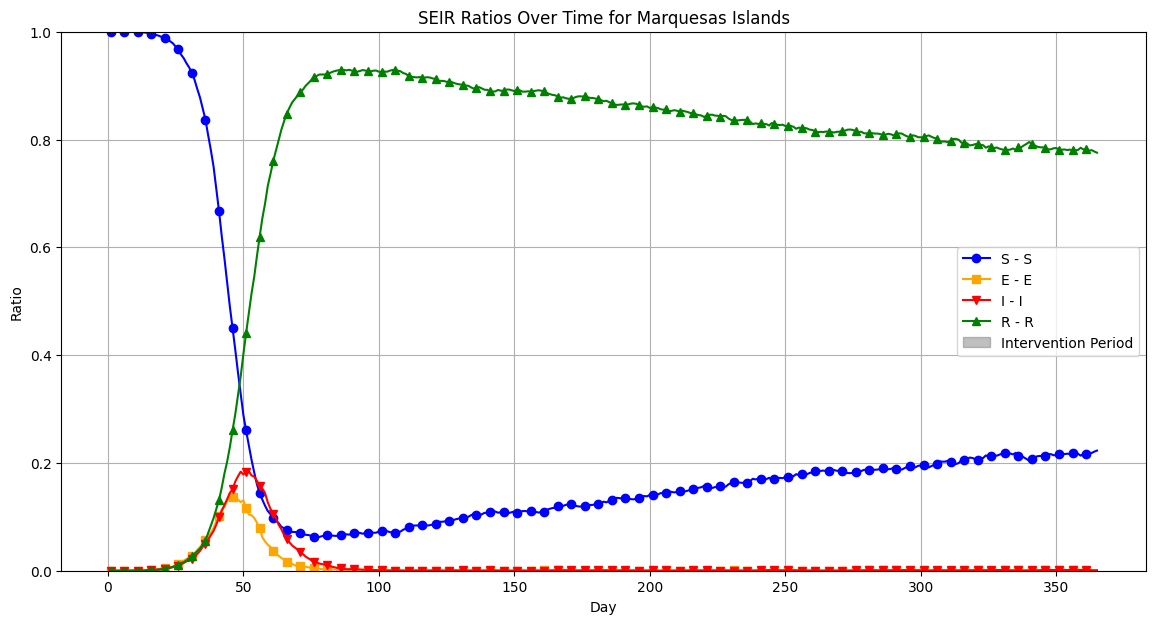

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


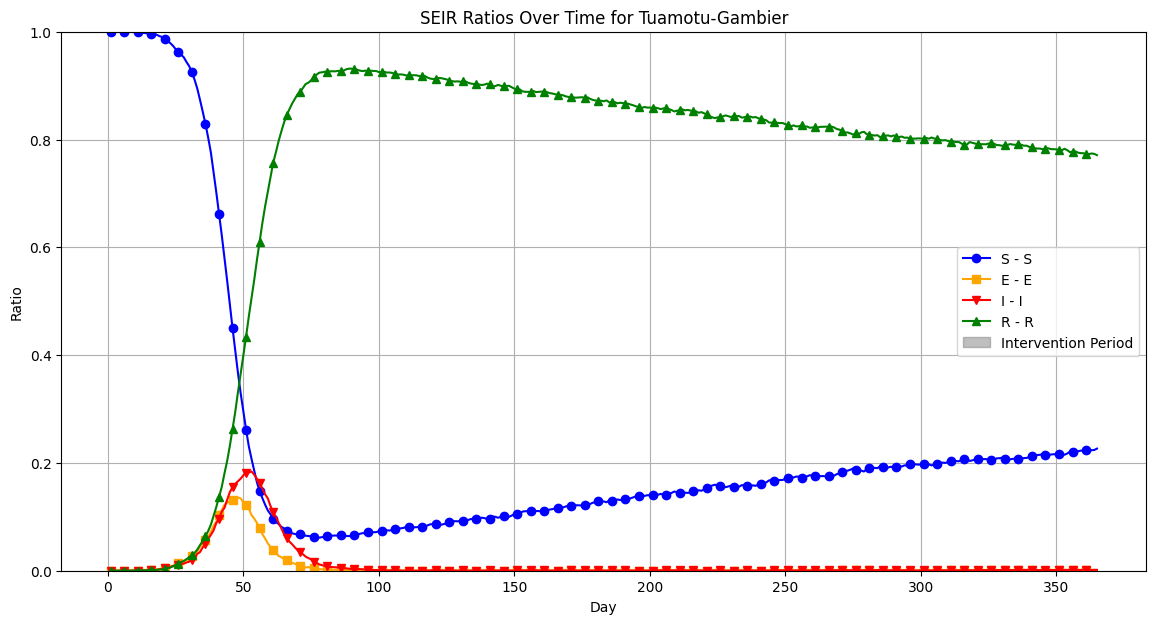

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


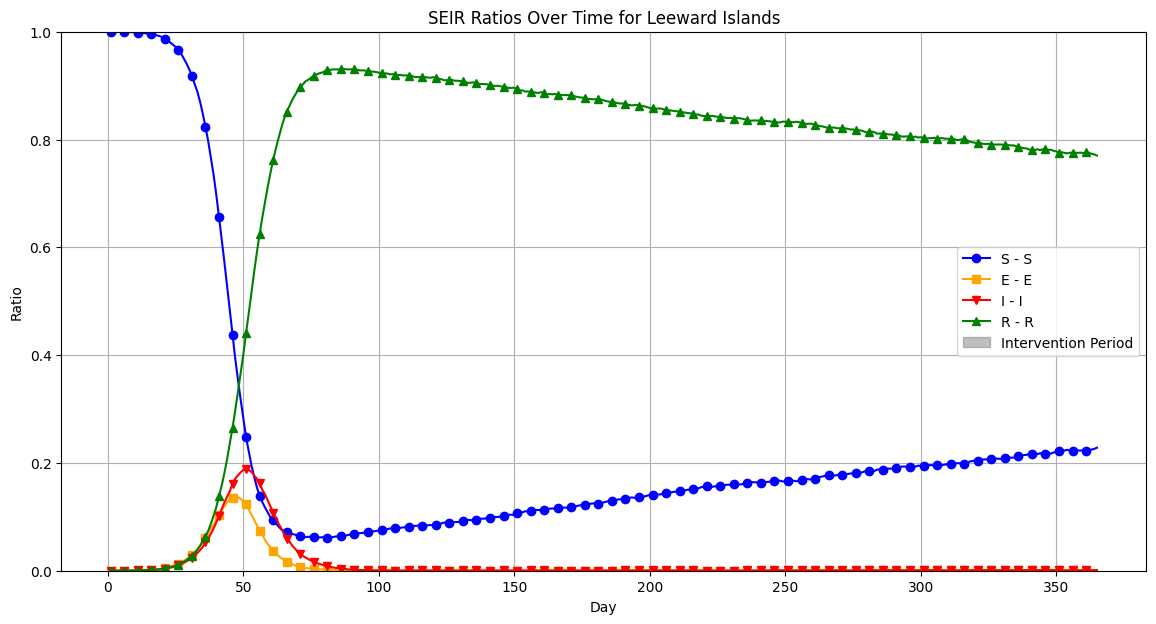

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


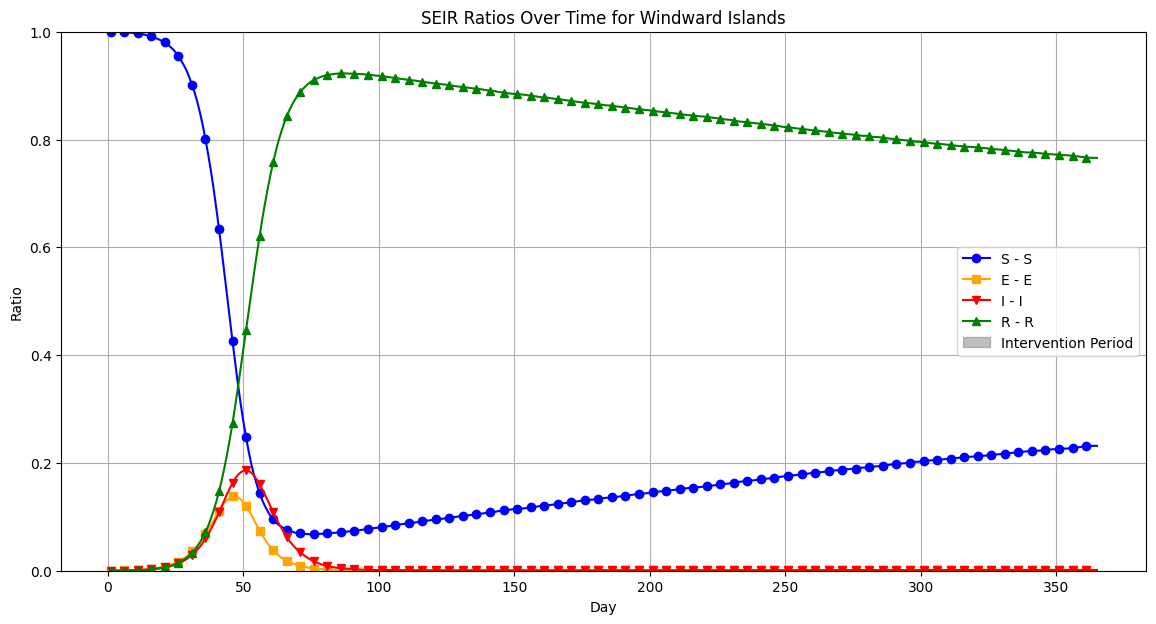

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


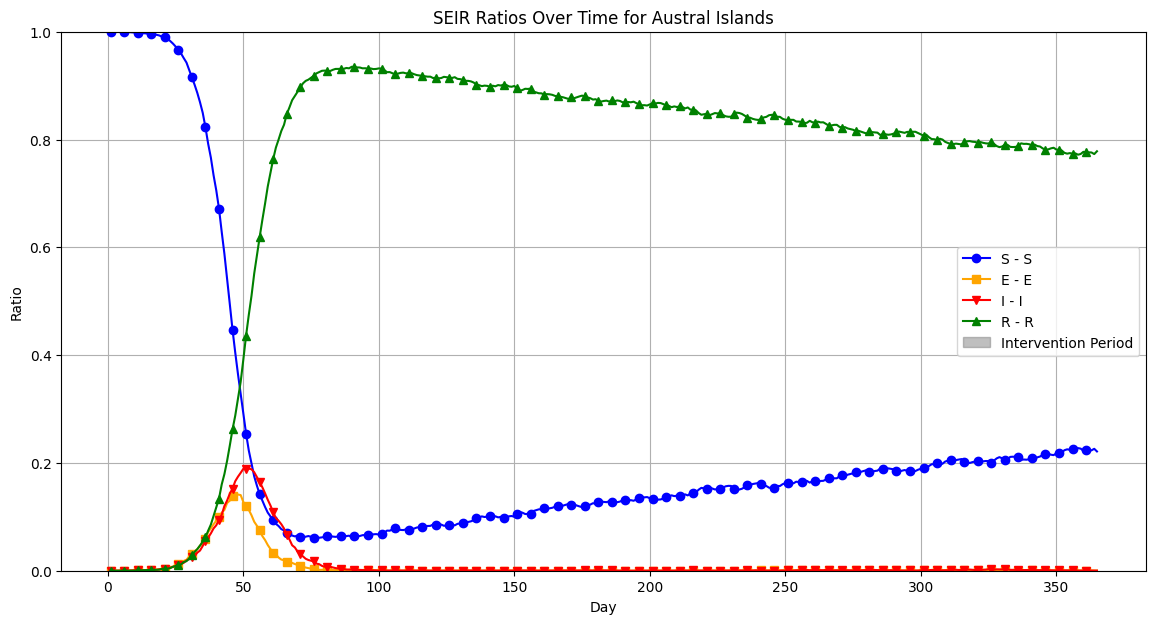

In [31]:
seir_plot_subdivisions(method_start=None, method_end=None, seir_history=seir_history, subdivision=subdivision)

### 9. Lockdown Method

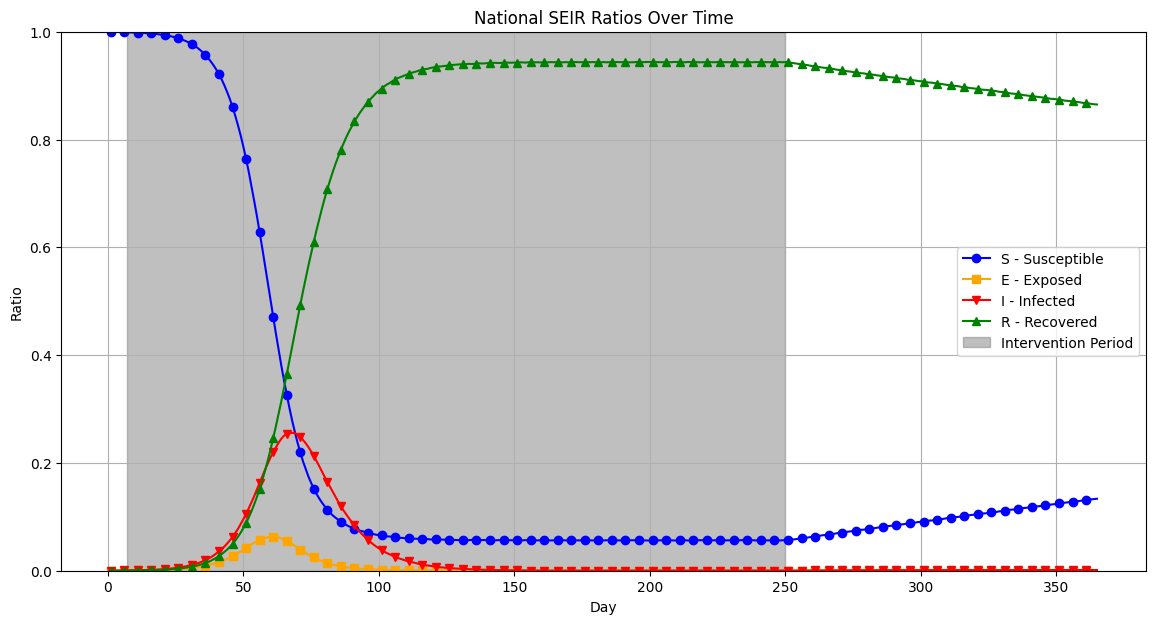

In [17]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.10  # Recovery rate
γ = 0.50  # Progression rate from exposed to infectious

ls = 7 # Lockdown start day
le = 250 # Lockdown end day
lockdown_communities = ['Outside World'] # Lockdown location


lockdown_seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

original_binary_matrix = binary_matrix.copy()
original_volume_matrix = volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

for day in range(1, Tmax + 1):
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)

        community_seir = seir_statement(day, inbound, community_seir)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix)
        #print(migration_df)
        community_seir = infection(α, β, γ, community_seir)
        lockdown_seir_history[day] = community_seir

seir_plot(method_start=ls, method_end=le, seir_history=lockdown_seir_history)

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


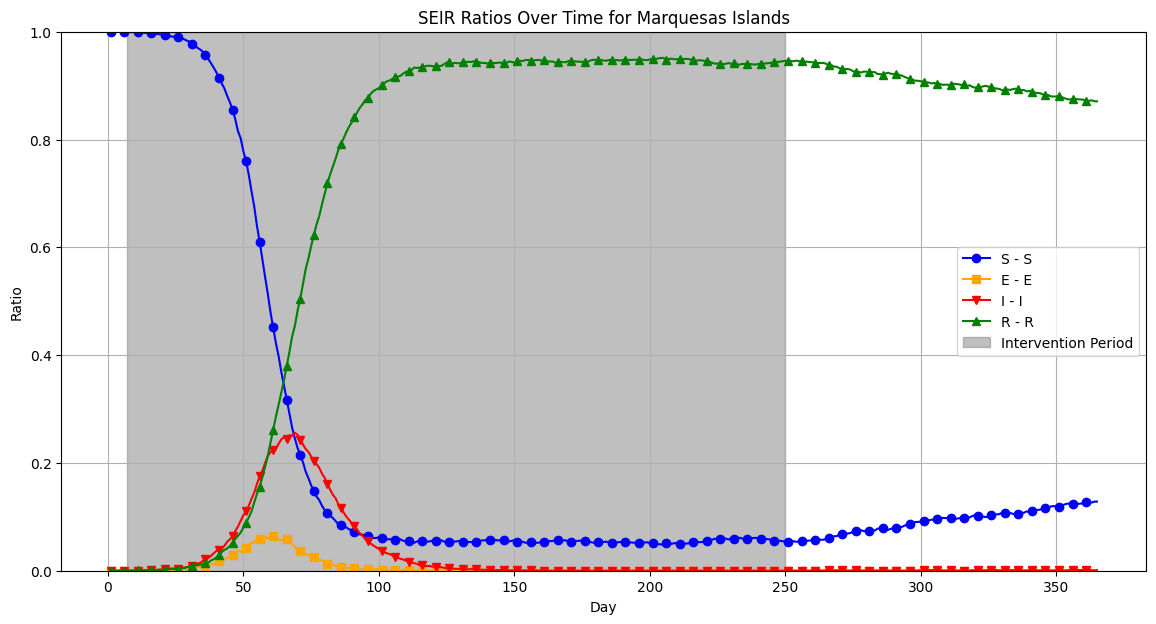

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


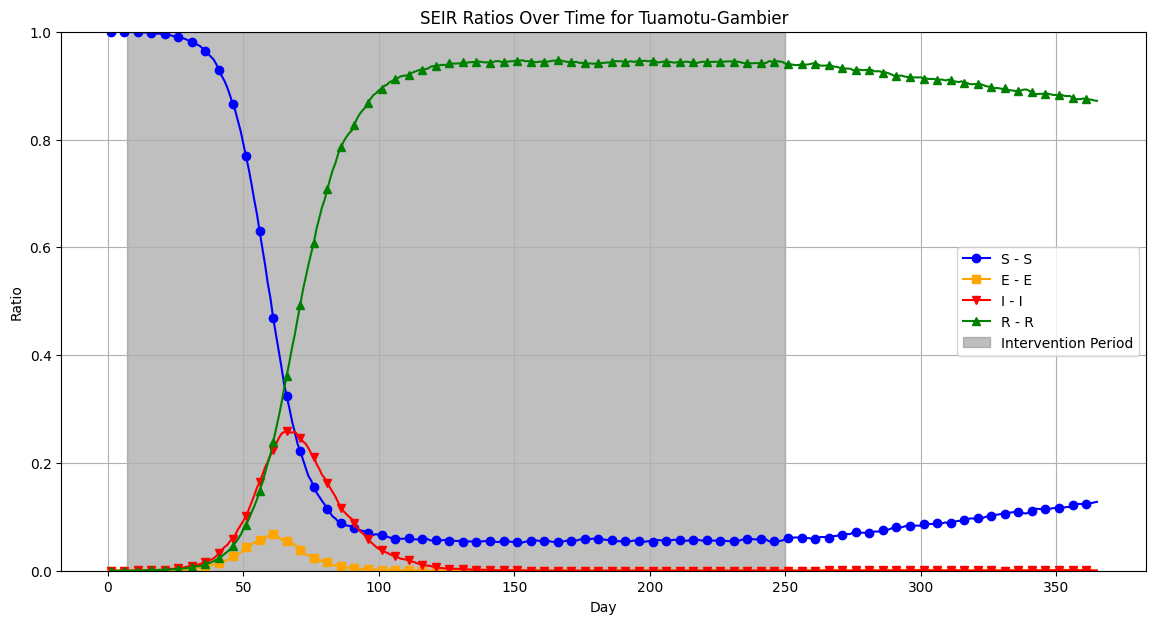

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


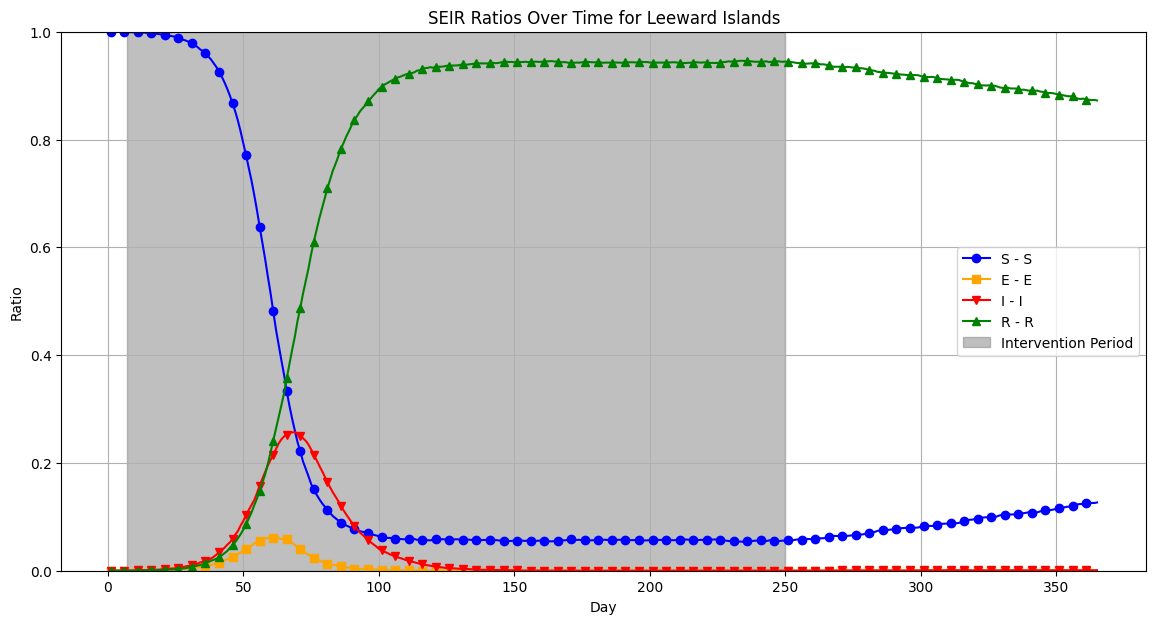

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


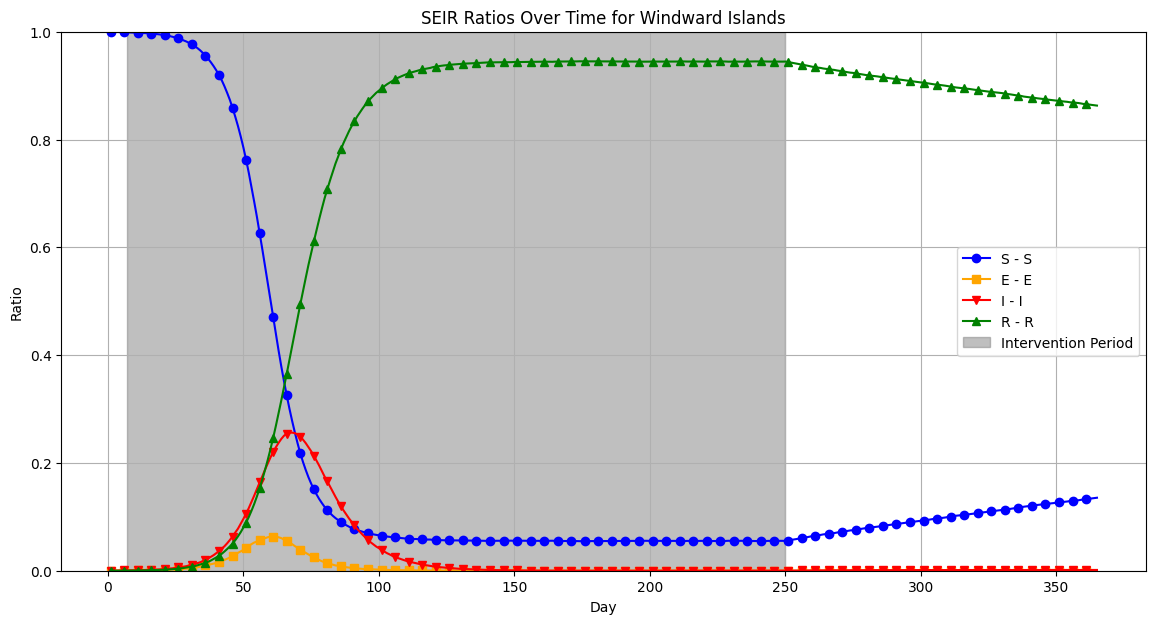

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


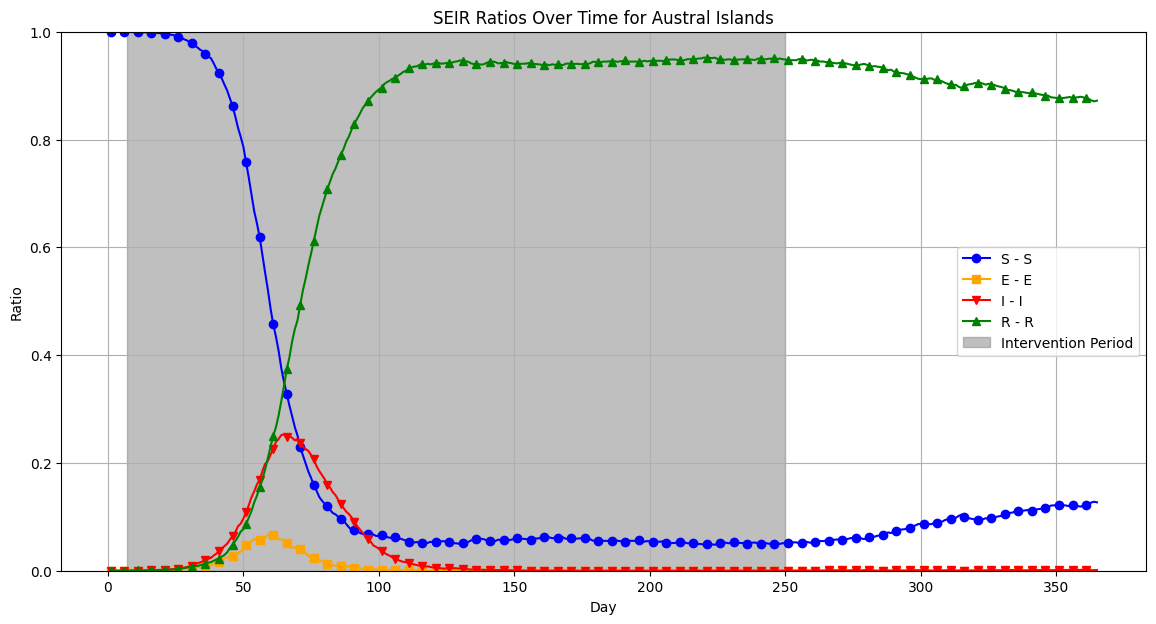

In [32]:
seir_plot_subdivisions(method_start=ls, method_end=le, seir_history=lockdown_seir_history, subdivision=subdivision)

### 10. Social Distance

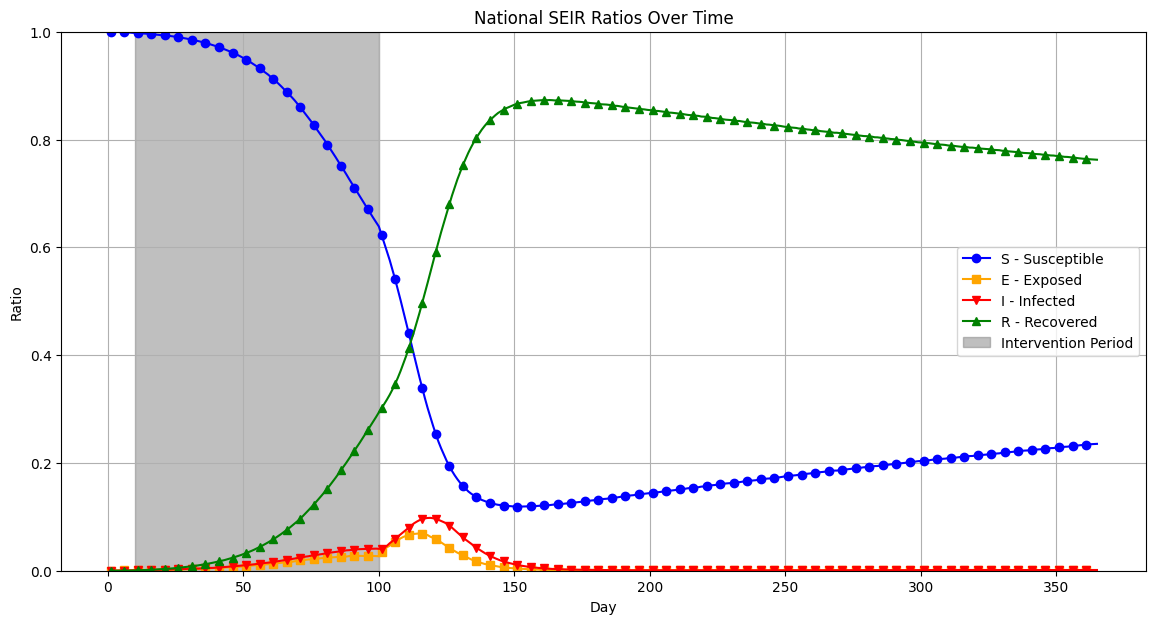

In [18]:
Tmax = 365

α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

ss = 10 # Social distance start day
se = 100 # Social distance end day

social_seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, inbound, community_seir)
    if ss <= day <= se:
        social_volume = volume_matrix * 0.5
        social_α = α * 0.5 
        community_seir, migration_df = migration(community_seir, binary_matrix, social_volume)
        community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
        community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    social_seir_history[day] = community_seir
    
seir_plot(method_start=ss, method_end=se, seir_history=social_seir_history)

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


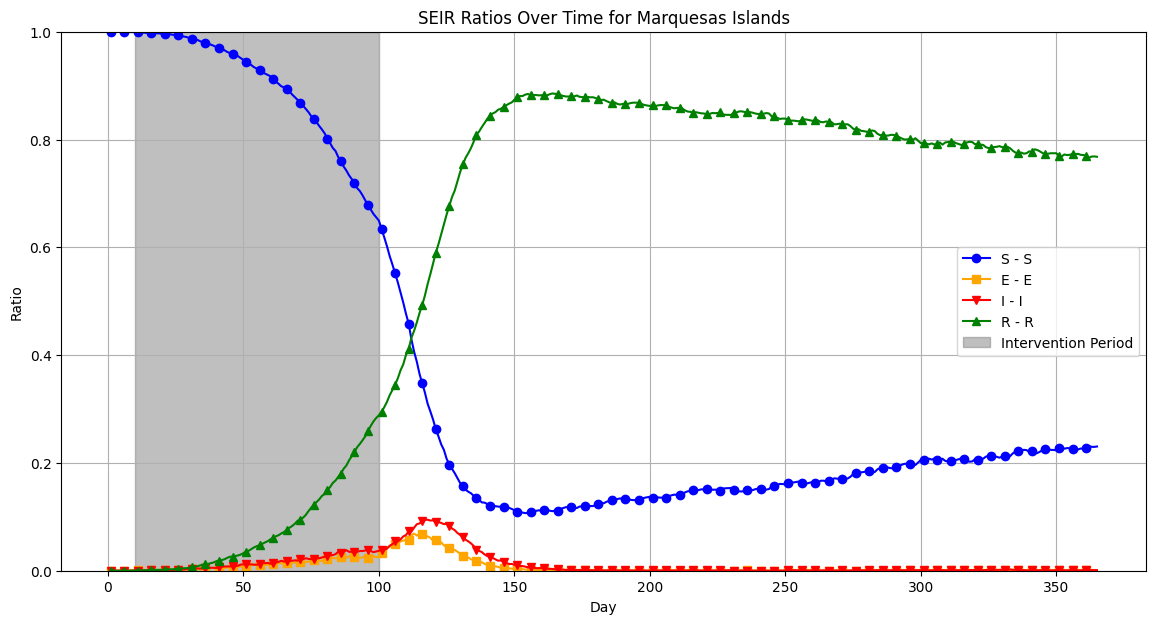

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


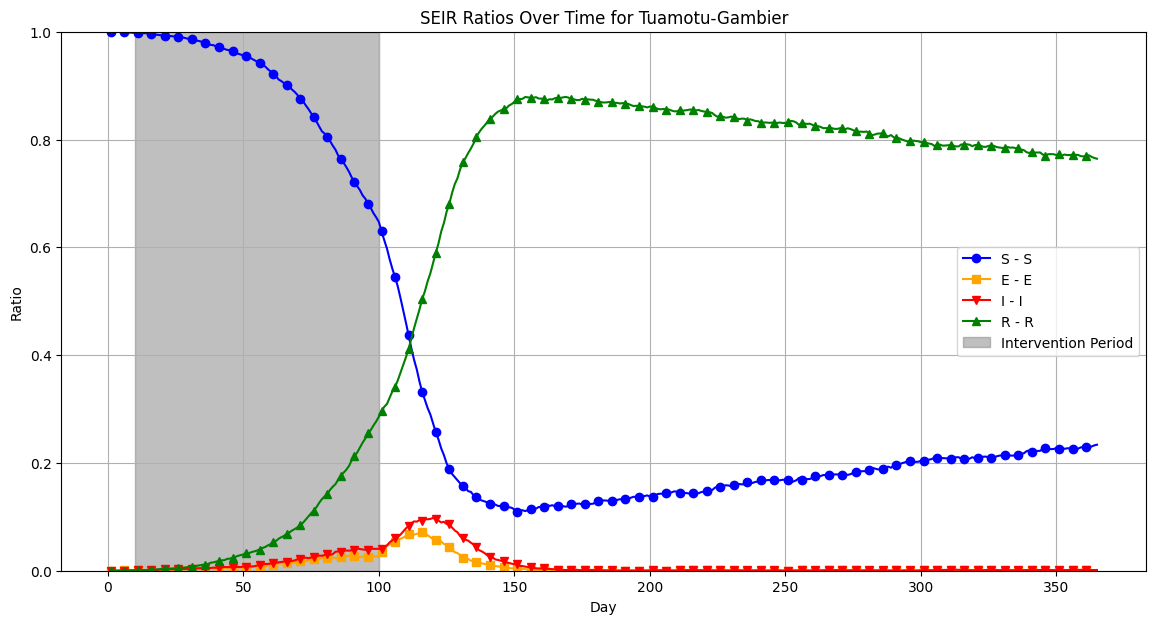

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


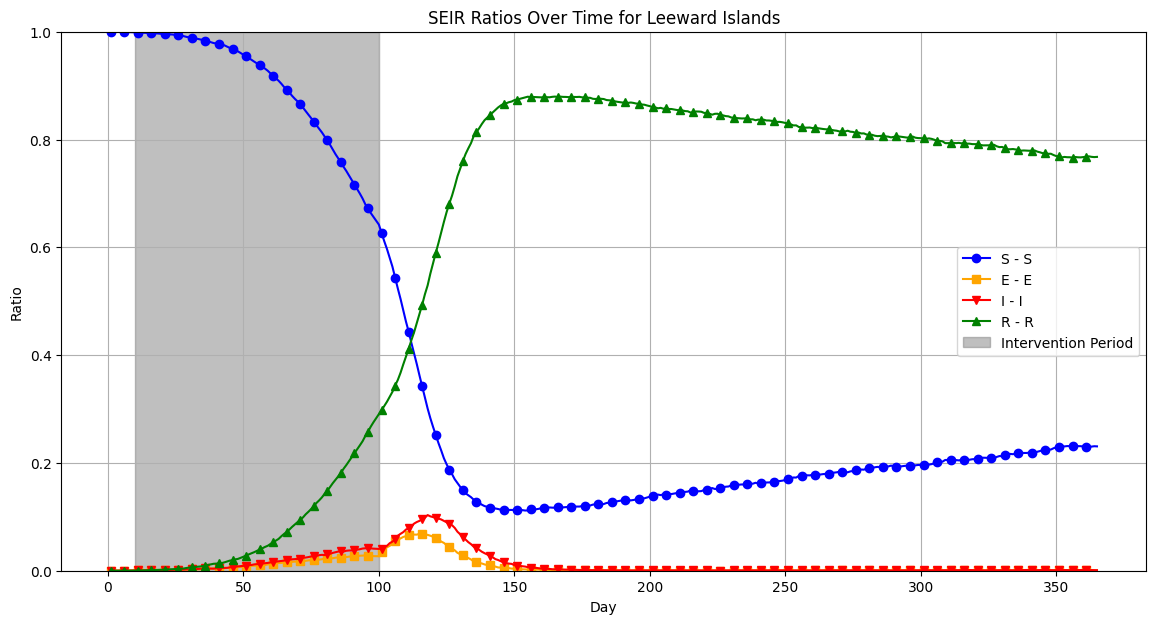

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


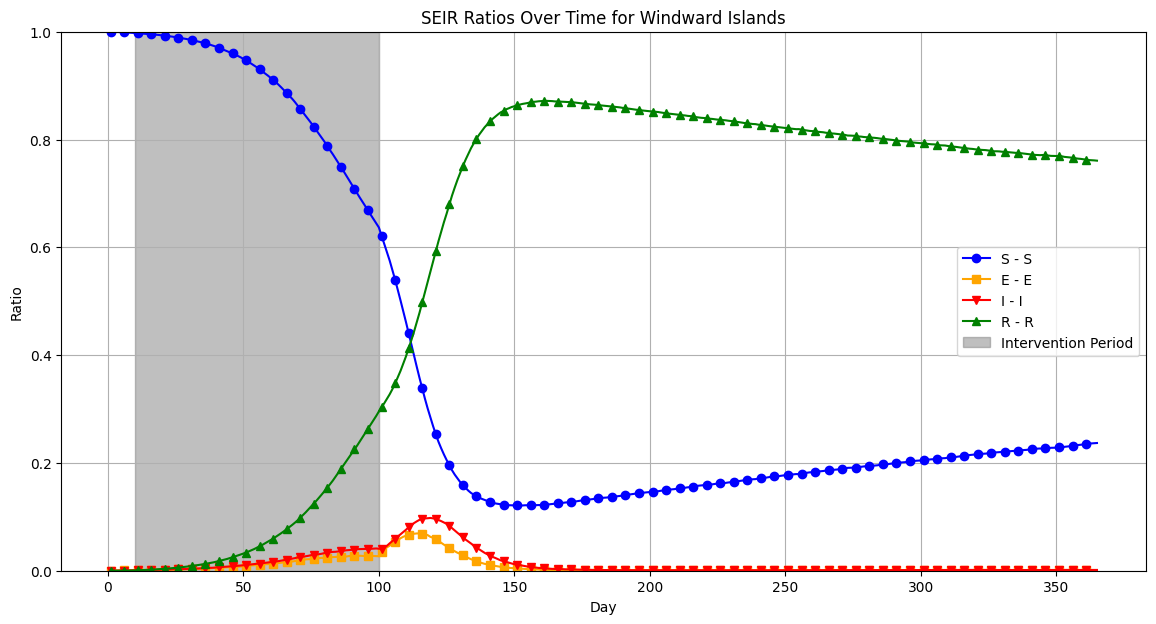

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


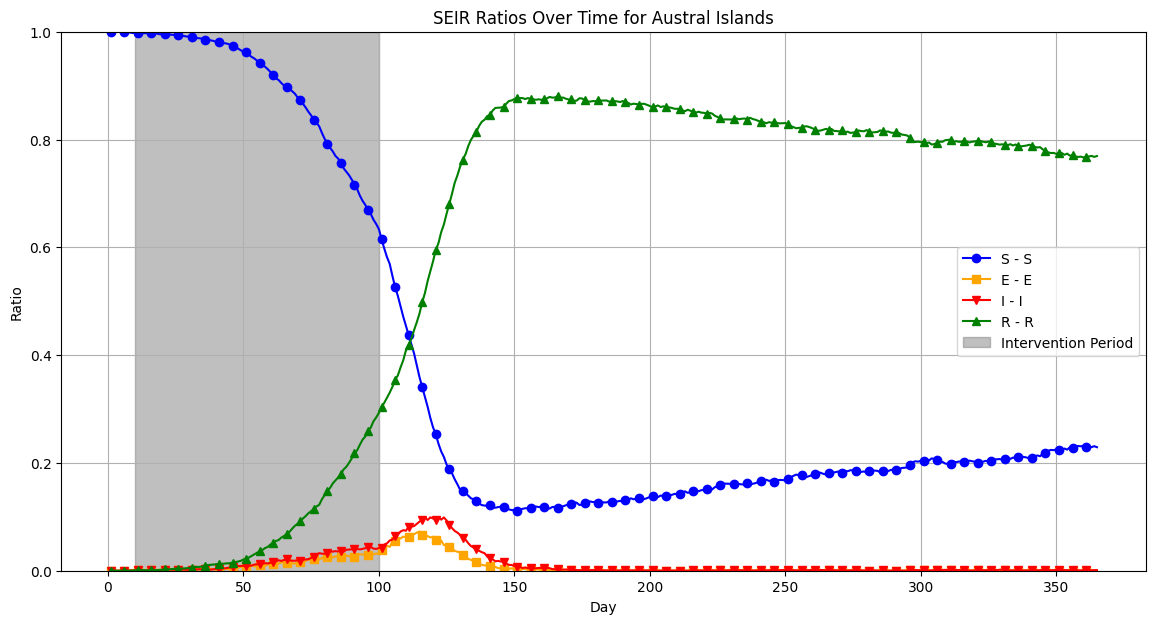

In [33]:
seir_plot_subdivisions(method_start=ss, method_end=se, seir_history=social_seir_history, subdivision=subdivision)

### 11. Work From Home

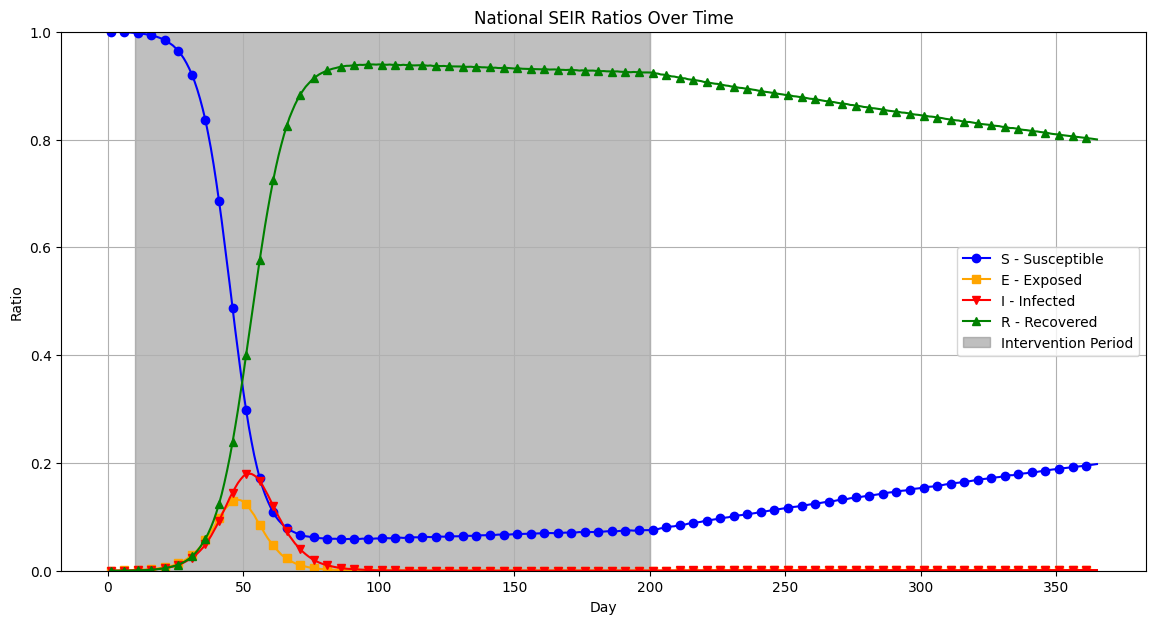

In [19]:
Tmax = 365

α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

ws = 10 # Work from home start day
we = 200 # Work from home end day
work_seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, inbound, community_seir)
    if ws <= day <= we:
        work_volume = volume_matrix * 0.2
        #social_α = α * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, work_volume)
        #community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
    community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    work_seir_history[day] = community_seir
    
seir_plot(method_start=ws, method_end=we, seir_history=work_seir_history)

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


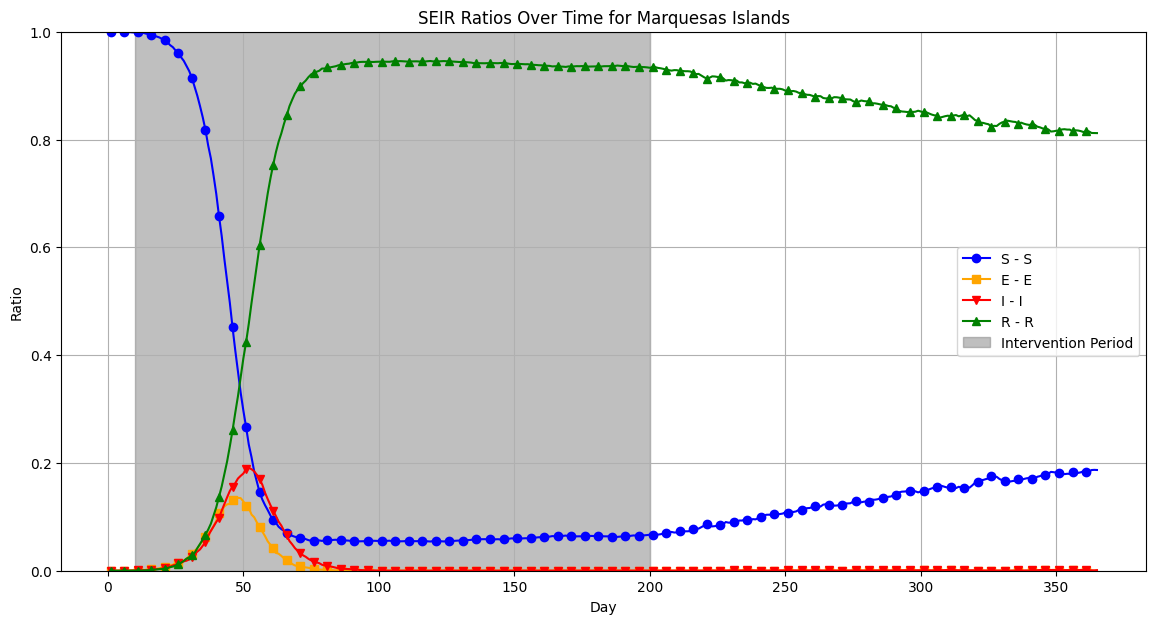

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


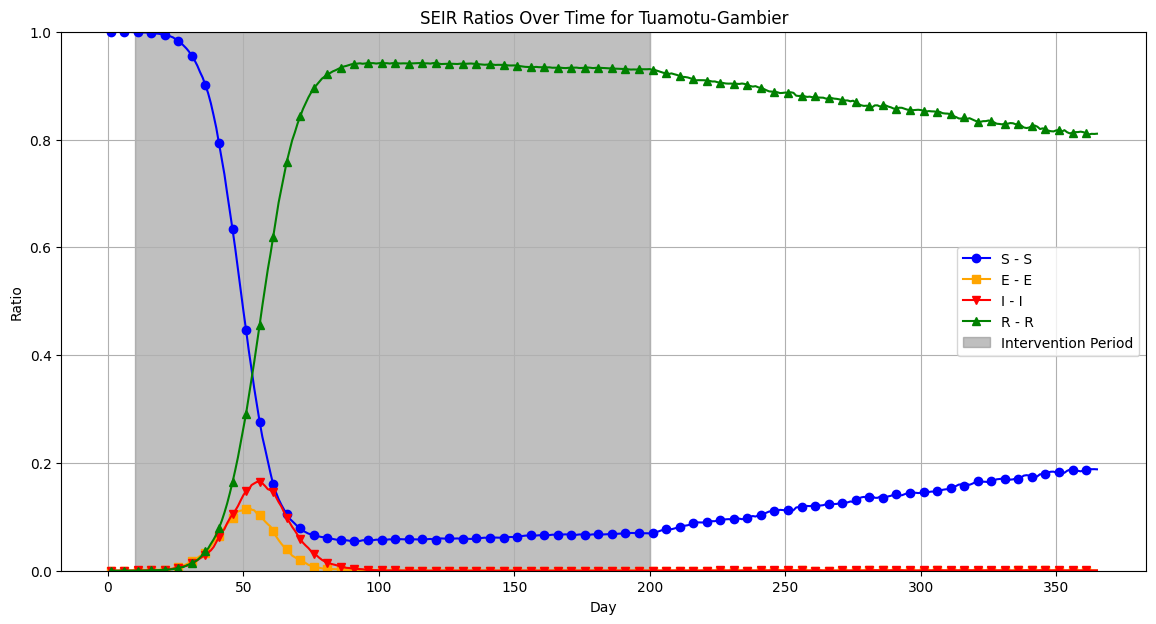

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


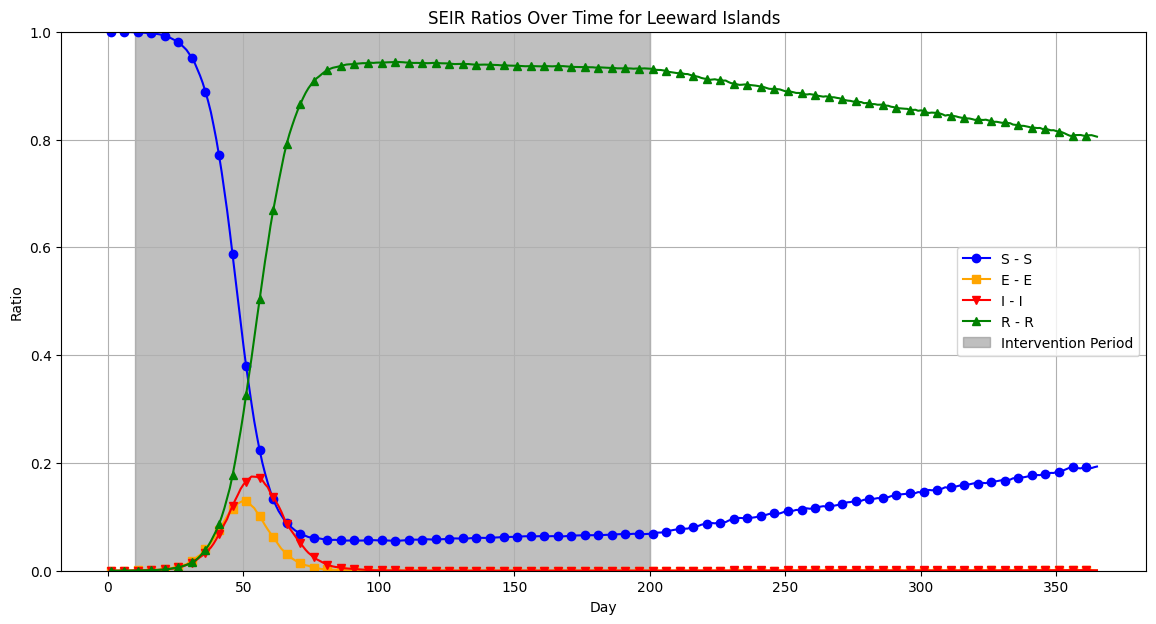

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


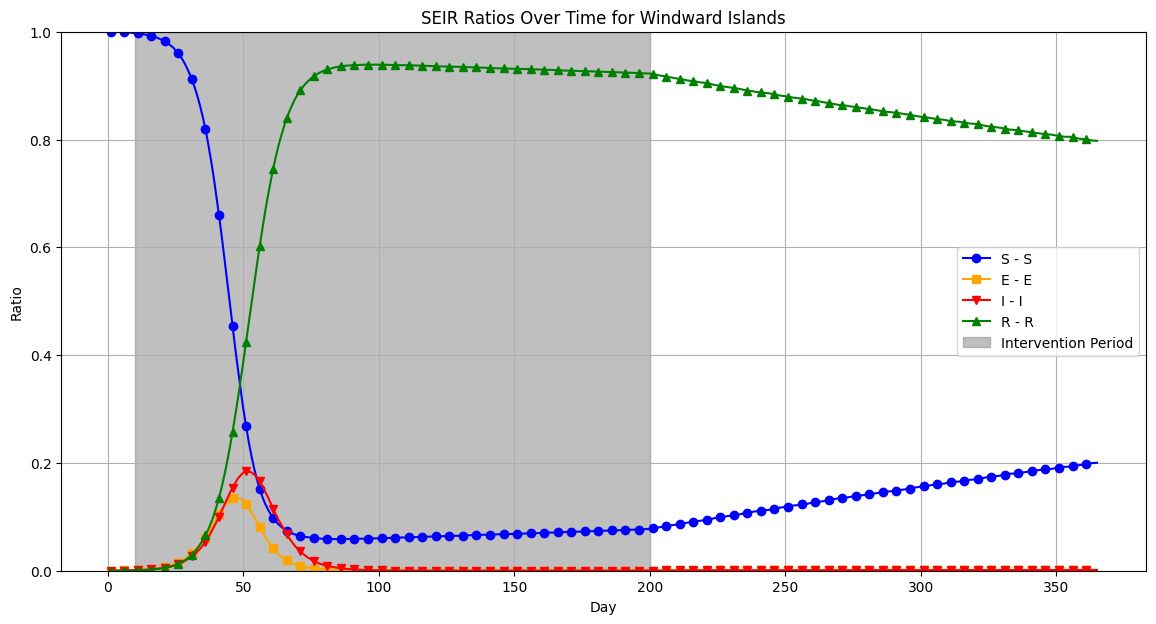

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


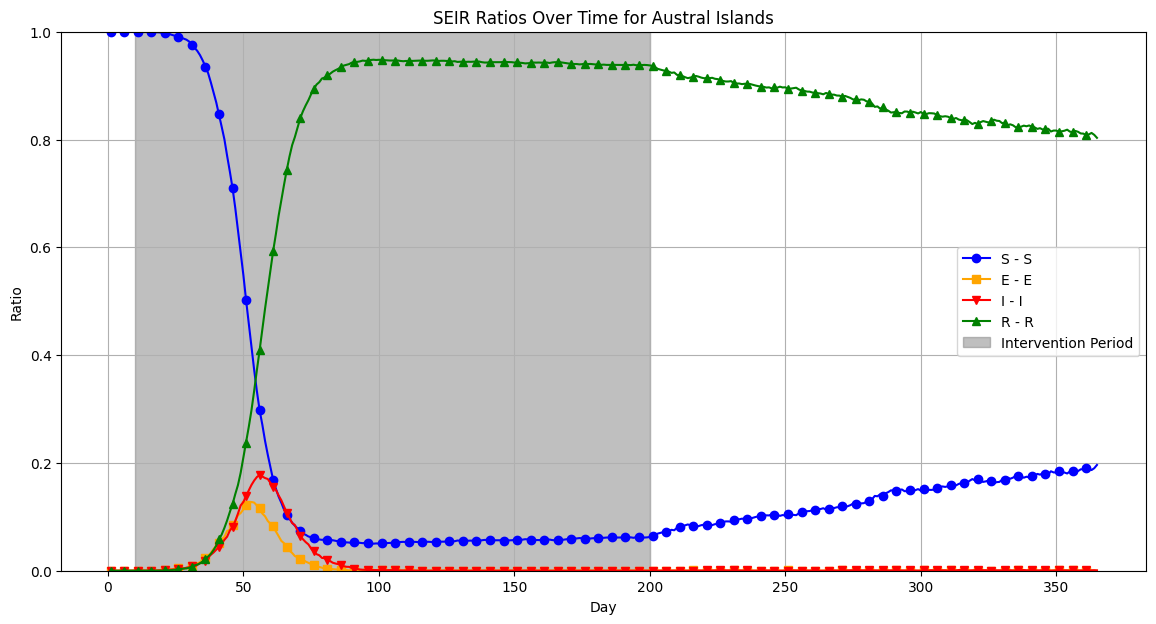

In [34]:
seir_plot_subdivisions(method_start=ws, method_end=we, seir_history=work_seir_history, subdivision=subdivision)

### 12. Face Mask

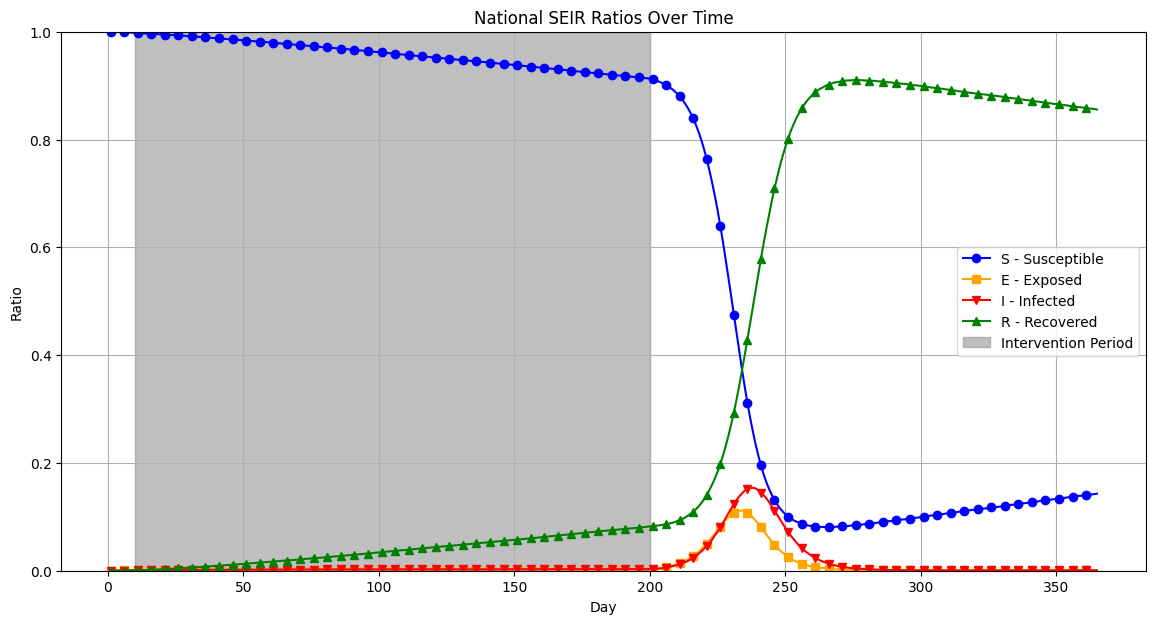

In [20]:
Tmax = 365

α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

ms = 10 # Social distance start day
me = 200 # Social distance end day

mask_seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, inbound, community_seir)
    if ms <= day <= me:
        mask_α = α * (1 - 0.7)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
        community_seir = infection(mask_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
        community_seir = infection(α, β, γ, community_seir)
    # print(migration_df)
    mask_seir_history[day] = community_seir
    
seir_plot(method_start=ms, method_end=me, seir_history=mask_seir_history)

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


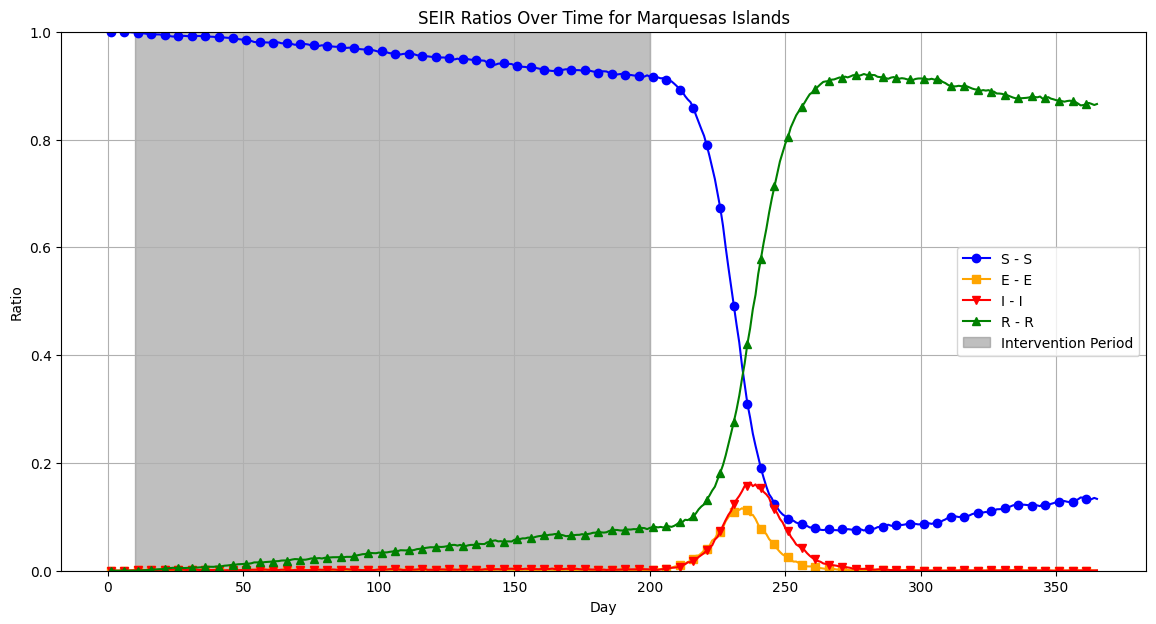

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


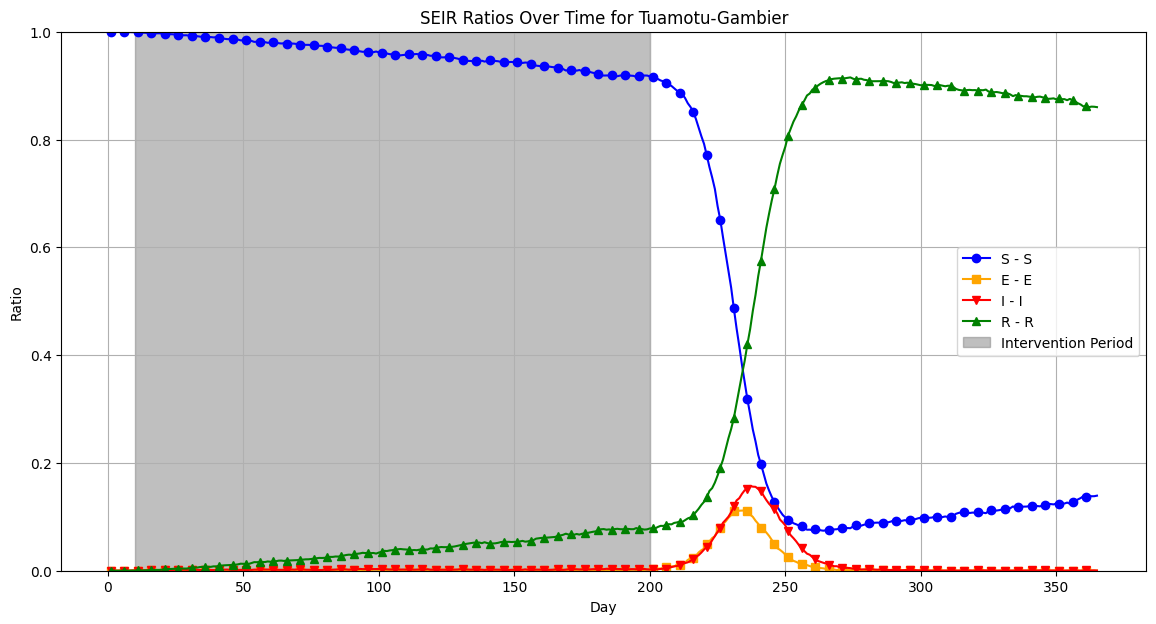

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


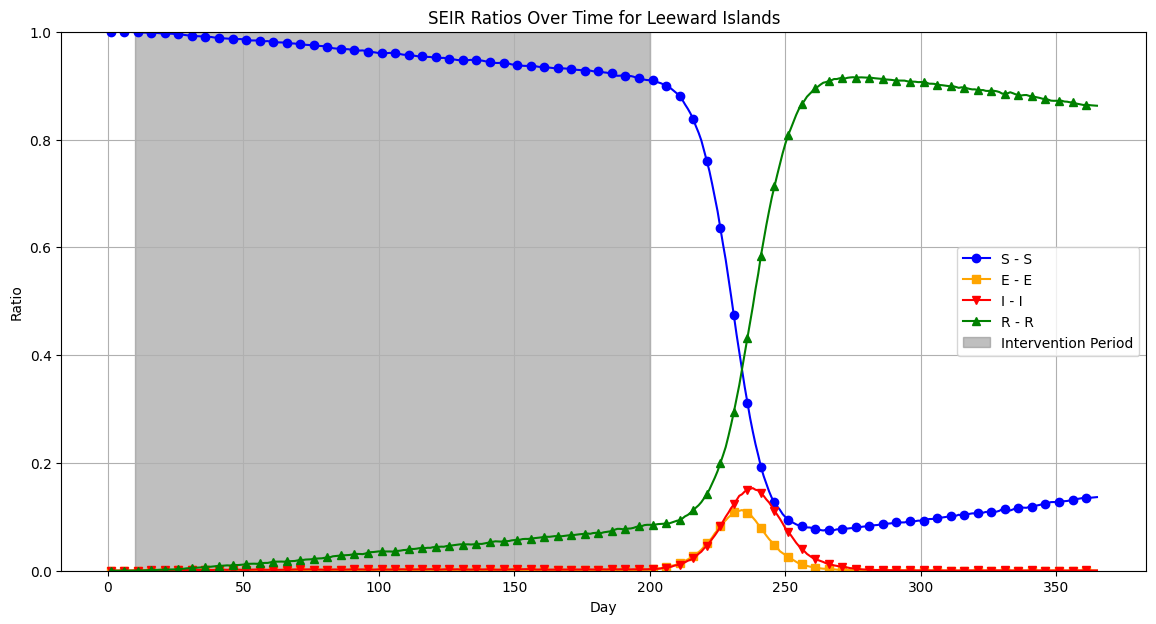

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


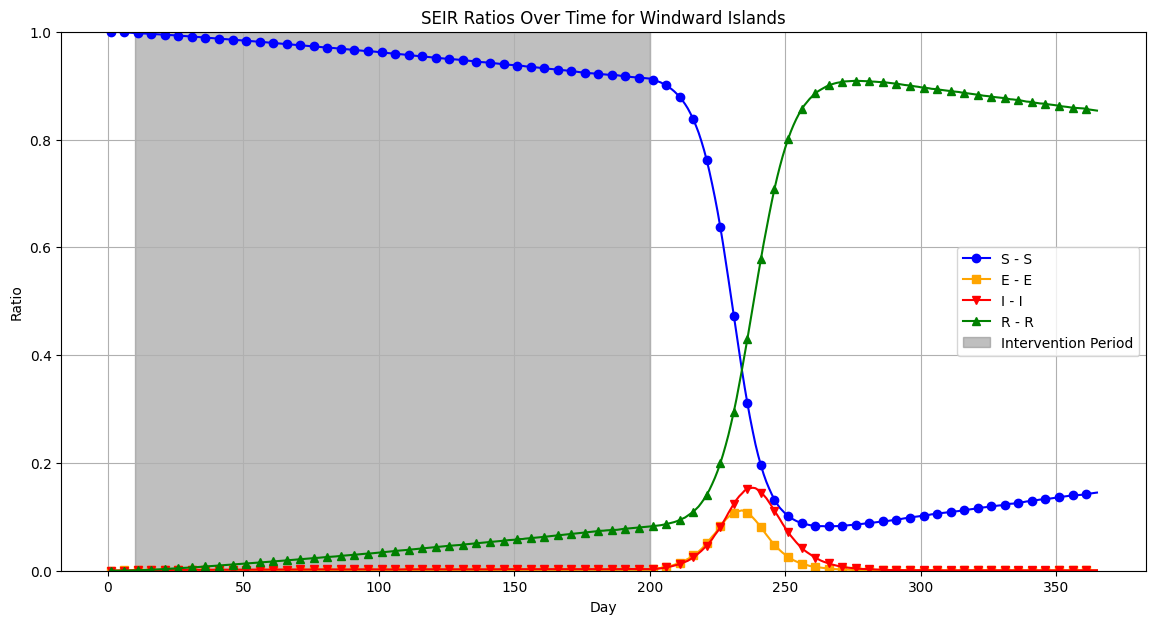

/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Total'] = group_data[['S', 'E', 'I', 'R']].sum(axis=1)
/var/folders/6b/kz_zdjy5609583gv1q69hvcm0000gn/T/ipykernel_98464/512629250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data[f'{compartment}_ratio'] = group_data[compartment] / group_data['Total']


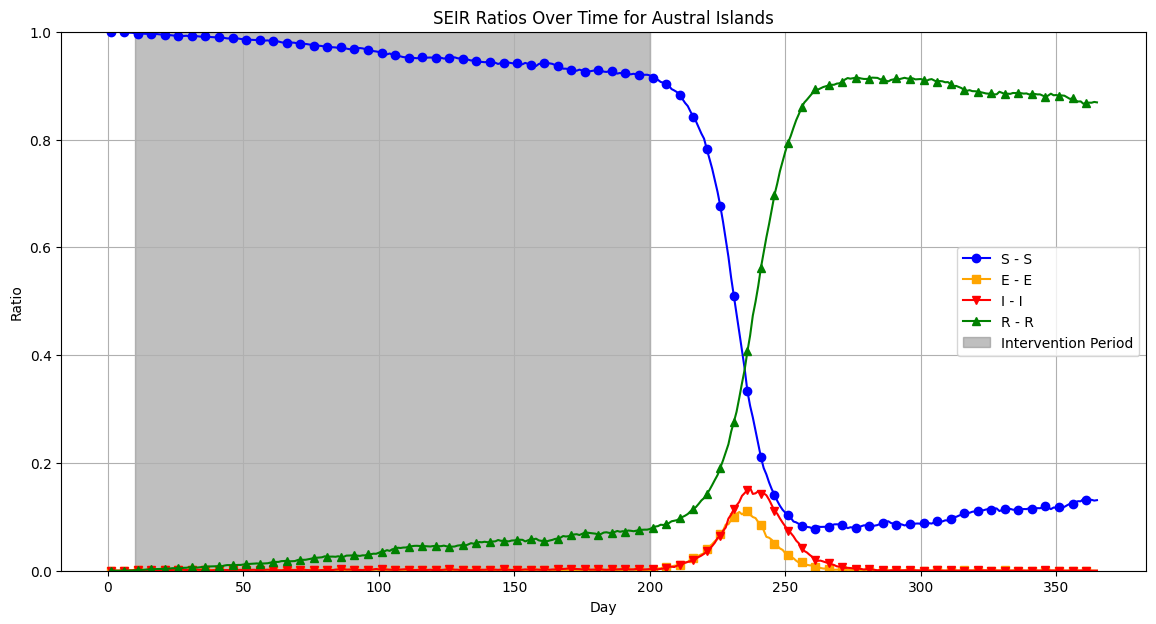

In [35]:
seir_plot_subdivisions(method_start=ms, method_end=me, seir_history=mask_seir_history, subdivision=subdivision)